In [1]:
# Dependencies and Setup
#SQL Alchemy
from sqlalchemy import create_engine

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# NumPy
import numpy as np
import scipy.stats as sts


In [2]:
# Create Engine and Pass in Postgres Connection
# Setup to Connect to Database 

username="postgres"
password="lotie"
db_name="Employee_db"
hostname="localhost"
engine = create_engine(f'postgresql://{username}:{password}@{hostname}:5433/{db_name}')
connection = engine.connect()

In [3]:
# Query All Records in the Salaries Table
salaries_data = pd.read_sql("SELECT * FROM salaries", connection)
salaries_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
# Query All Records in the Titles Table
titles_data = pd.read_sql("SELECT * FROM titles", connection)
titles_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [5]:
employees_salaries = pd.read_sql("select T.title, S.salary from employees E join salaries S on E.emp_no = S.emp_no join titles T on E.emp_title_id = T.title_id ", connection)
employees_salaries.head()

,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000


In [6]:
grouped_df = employees_salaries.groupby("title").mean()
grouped_df["salary"] = grouped_df["salary"].map("${:.0f}".format)
grouped_df 

,salary
title,
Assistant Engineer,$48564
Engineer,$48535
Manager,$51531
Senior Engineer,$48507
Senior Staff,$58550
Staff,$58465
Technique Leader,$48583


In [7]:
grouped_df =grouped_df.reset_index()
grouped_df

,title,salary
0,Assistant Engineer,$48564
1,Engineer,$48535
2,Manager,$51531
3,Senior Engineer,$48507
4,Senior Staff,$58550
5,Staff,$58465
6,Technique Leader,$48583


TypeError: can only concatenate str (not "int") to str

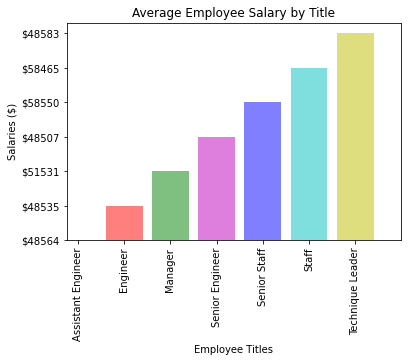

In [8]:
# Set x_axis, y_axis & Tick Locations
x_axis = grouped_df["title"]
ticks = np.arange(len(x_axis))
y_axis = grouped_df["salary"]
 
# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=["k", "r", "g", "m", "b", "c", "y"])

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(grouped_df["salary"])+100)
# Save Figure
plt.savefig("./Image/average_salary_by_title.png")

# Show plot
plt.show()